# IRIS（アヤメ）のデータセットを使った機械学習サンプル
機械学習アルゴリズムの一つである決定木をアヤメのデータセットに対しscikit-learnで実装してみます。

この学習では、アヤメのガク及び花弁の長さ、幅からそのアヤメの種類を推測します。

## 決定木（Decision Tree）とは
決定木は、その名の通り木構造のモデルとなっていて、分類問題ないし回帰問題を解くの使用できる学習モデルです。

決定木は診断チャートのように条件に当てはまるか当てはまらないかを繰り返し判断し分類を行います。

## イメージ
<img src="chart.jpg" width="700px">

## 0. 必要なライブラリのインポート



In [99]:
import numpy as np
import pandas as pd



### pandas
pandasは、エクセルのようにデータを加工したり解析できるpython向けライブラリです。
pandas の基本的なデータ構造はDataFrame（データフレーム）です。DataFrameとは、Excelと同じデータ構造で、二次元のテーブルのことです。つまり行と列をもった配列データです。DataFrameの列データに付与するラベルをカラム（columns）と呼びます。

### Numpy

機械学習ライブラリのscikit-learnでは、NumPy配列として計算されます。
Scikit-learnを使って機械学習をする場合、最終的にはpandasデータフレームをNumpy配列に変換する必要があります。

### 学習の手順
したがって、一般的な学習のフローは以下のとおりとなります

1. pandasでcsv等のファイルを読み込む
1. pandasでcsv等のファイルのデータを加工する（文字列の数値変換、欠損値の補完等）
1. pandasのデータフレームからNumpy配列に変換する（pandasの列指定して読み込めば勝手にNumPyの配列になります。また必要であれば学習データとテストデータに分割します）
1. 指定したデータをscikit-learnで機械学習処理する
1. scikit-learnでできたモデルを評価する


In [100]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

### sklearn3種
機械学習ライブラリであるScikit-learnから必要なクラスやモジュールのみをインポートしています。
#### from sklearn.datasets import load_iris
Scikit-learnが持つアイリスデータセットのデータをインポートしています
#### from sklearn import tree
学習モデルである決定木（DecisioTree）のモデルをインポートしています
#### sklearn.model_selection import train_test_split
Irisのデータセットを学習データとテストデータに分割する便利機能をインポートしています。

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pydotplus
from io import StringIO

### matplotlib \ seaborn
データをグラフ化するためのライブラリ群です

### pydotplus \ StringIO
今回は最後に決定木の可視化を行うためにインポートしています。少し発展的な内容になりますので今回は触れません。




## 1. アヤメのデータをpandasのDataFrameに格納する

In [102]:
iris = load_iris() #アヤメのデータを読み込み、変数irisに格納する

In [103]:
df_iris = pd.DataFrame(iris.data,columns = iris.feature_names) #irisデータをPandasDataFrameに格納
df_iris.head() #Irisの最初の5件を表示

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### 各列（カラム）の構成

* sepal length (cm)	がく片の長さ
* sepal width (cm)	がく片の幅
* petal length (cm)	花弁の長さ
* petal width (cm)	花弁の幅


In [104]:
df_iris["Target"] =iris.target #Pandasデータフレームにアヤメの種類のデータ（答え列）を追加
df_iris.head() #Irisの最初の5件を表示

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 答えとしてTarget列を追加
#### 品種

* 0	'setosa'
* 1	'versicolor'
* 2	'virginica'

<img src="iris.png">

## 2. アヤメのデータのDataFrameを詳しく見る

### グループ化して平均データや統計データ、各データ感の関係などを見る

通常、読み込んだDataFrameでは欠損値の穴埋めや、データ型の変更などの処理を行いますが、今回のデータはそのまま分析できる形になっているため処理は行いません。

その代わり、pandas．DataFrameの持つ、便利な機能を使い各あやめの種類のガク、花弁のサイズの平均や、統計データを確認してみます。

In [105]:
df_iris.groupby("Target").mean() #各アヤメの品種ごとのガク、花弁サイズの平均を表形式で表示する

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Target,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [106]:
df_iris.groupby("Target").describe() #各アヤメの品種ごとのガク、花弁サイズの最小最大平均などの統計情報を表形式で表示する

petal length (cm)                                               \
                   count   mean       std  min  25%   50%    75%  max   
Target                                                                  
0                   50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
1                   50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
2                   50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

       petal width (cm)        ...  sepal length (cm)      sepal width (cm)  \
                  count   mean ...                75%  max            count   
Target                         ...                                            
0                  50.0  0.244 ...                5.2  5.8             50.0   
1                  50.0  1.326 ...                6.3  7.0             50.0   
2                  50.0  2.026 ...                6.9  7.9             50.0   

                                                      
         mean       std  min    25%  50%    75%  max  
Target                                                
0       3.418  0.381024  2.3  3.125  3.4  3.675  4.4  
1       2.770  0.313798  2.0  2.525  2.8  3.000  3.4  
2       2.974  0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

### 品種ごとの各要素の関係をプロットし表示してみる
また、DataFrame型のデータはmatplotlibやSeaboanなどのライブラリと連携し簡単にグラフを書き出すことができます

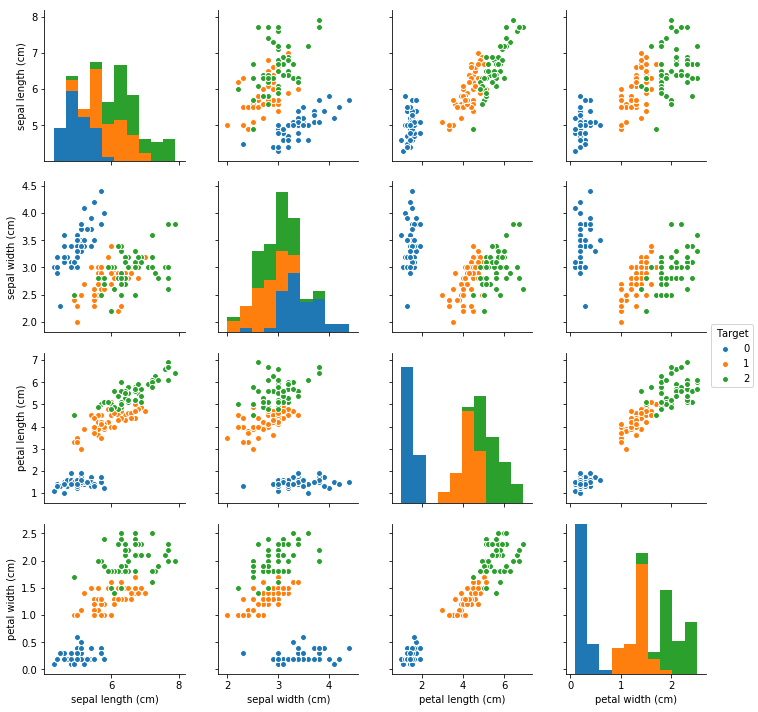

In [107]:
sns.pairplot(data=df_iris, hue='Target', vars=iris.feature_names)

## 3.Irisのデータフレームを学習データとテストデータに分割する
学習モデルの精度を検証できるように、作成したデータフレームを学習用のデータとテスト用のデータに分けます。

train_test_splitを使うことにより、中のデータフレームのデータがランダムに学習データとテスト用データに分割されます。

下にそれぞれ最初の5件を書き出しています。
***
* X_train=トレーニングデータ
* X_test=テストデータ
* y_train=トレーニングデータの答え
* y_test=テストデータの答え


In [108]:
X_train,X_test,y_train,y_test =train_test_split(df_iris.drop(["Target"],axis=1),df_iris["Target"],random_state=0)

In [109]:
X_train[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [110]:
y_train[:5]

61     1
92     1
112    2
2      0
141    2
Name: Target, dtype: int64

In [111]:
X_test[:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [112]:
y_test[:5]

114    2
62     1
33     0
107    2
7      0
Name: Target, dtype: int64

## 4.学習データを使って決定木に学習(fit)させる
変数ｃｌｆに決定木学習機のクラスを呼び出します。

呼び出す際に引数にパラメータを設定することができます。

今回はツリーの深さ(max_depth)を３とする、という１点のみ指定しています。

その後決定木にX_train,y_trainデータを学習（fit）させれば学習は完了です。

In [113]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## 5.scikit-learnでできたモデルを評価する

clf.score（テストデータ、テストデータの答え）とすることで、テストデータを使った検証ができます。
帰ってくる値は、正答率です。

今回の場合**97.3%**の正答率でアヤメの品種分類ができています。

In [114]:
clf.score(X_test, y_test)

0.9736842105263158

## Advanced.　決定木を可視化する

決定木を利用した機械学習モデルはその判断基準を可視化することができます。

下のコードはgraphvizを使ってモデルの判断基準を可視化したものです。

これを見るとこの決定木は以下のように判断しているようです。

1. petal_length(花弁の長さ）が**2.35cm以下**の場合**setora**、それ以上の場合は**判断2**へ
1. petal_length(花弁の長さ）が**4.95cm以下**の場合**判断3**へ、それ以上の場合は**判断4**へ
1. petal_width(花弁の幅）が**1.65cm以下**の場合判断**versicolor**、それ以上の場合は**verginica**
1. petal_length(花弁の長さ）が**5.05cm以下**の場合判断**verginica**、それ以上の場合でも**verginica**




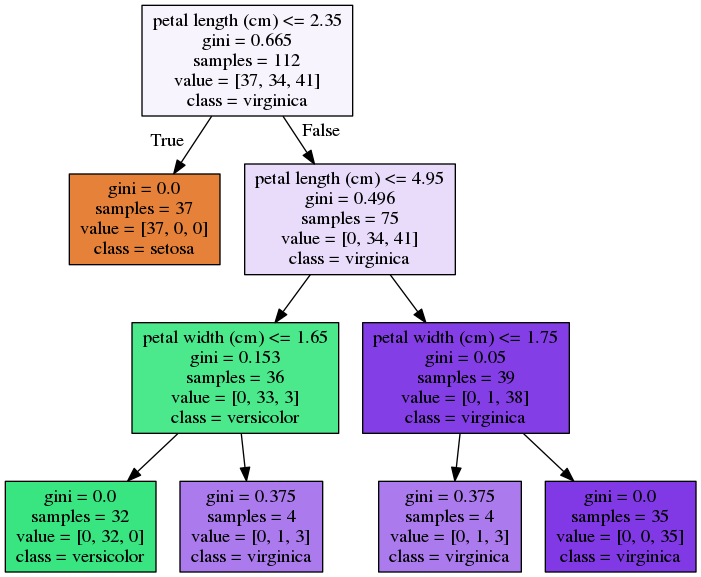

In [115]:
dot_data = StringIO()
tree.export_graphviz(clf,class_names=iris.target_names, out_file=dot_data,feature_names=df_iris.drop("Target",axis=1).columns, max_depth=3,filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())